# Age Classification Task 2

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from Preprocessing import preprocessRGB,facefeaturesdlib
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,Dropout
from keras.layers import MaxPooling2D 
from keras.models import Model
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import h5py
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


getting features in x_train,y_train,x_test,y_test for smiling attribute with testsize of 30% will take some time

In [37]:
x_train,y_train,x_test,y_test=facefeaturesdlib('smiling',.3,(64,64))
x_train=np.reshape(x_train,(x_train.shape[0],136),'f')
x_test=np.reshape(x_test,(x_test.shape[0],136),'f')
np.savetxt("x_train_featuresdlib.csv", x_train, delimiter=",")
np.savetxt("y_train_featuresdlib.csv", y_train, delimiter=",")
np.savetxt("x_test_featuresdlib.csv", x_test, delimiter=",")
np.savetxt("y_test_featuresdlib.csv", y_test, delimiter=",")

Use bellow cell to save time

In [38]:
x_test.shape

(1302, 136)

In [19]:

x_train = np.genfromtxt("x_train_featuresdlib.csv", delimiter=',')
y_train = np.genfromtxt("y_train_featuresdlib.csv", delimiter=',')
x_test = np.genfromtxt("x_test_featuresdlib.csv", delimiter=',')
y_test = np.genfromtxt("y_test_featuresdlib.csv", delimiter=',')

In [42]:
x_trainNN=np.reshape(x_train,(x_train.shape[0],68,2),'f')
x_testNN=np.reshape(x_test,(x_test.shape[0],68,2),'f')
x_trainNN.shape

(3035, 68, 2)

checking if features are correct

(3036,)

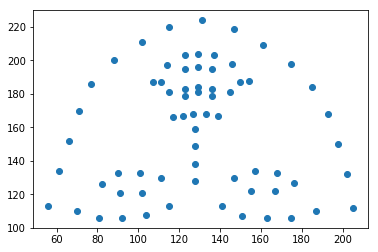

In [34]:
p=10
plt.scatter(x_trainNN[p,:,0],x_trainNN[p,:,1])
y_train.shape

## Support Vector Machine

In [12]:
from sklearn.svm import SVC
smilingsvm= SVC(kernel='rbf')
xtrain=np.reshape(x_train,(x_train.shape[0],136),'f')# reshaping into 2d for SVM 


In [39]:
smilingsvm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
yhat=smilingsvm.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)


0.7980030721966206

In [36]:
i=np.reshape(x_train,(3094,136),'f')

## Neural Network (fully Connected)

In [59]:
def customModel(input_shape):
    
    
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

   
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    #X = Flatten()(X_input)
    X = Dense(256, activation='relu', name='fc0')(X_input)
    X = Dropout(.3)(X)
    X = Dense(128, activation='relu', name='fc1')(X)
    X = Dropout(.3)(X)
    X = Dense(128, activation='relu', name='fc2')(X)
    X = Dropout(.3)(X)
    X = Dense(128, activation='relu', name='fc3')(X)
    X = Dropout(.3)(X)
    X = Dense(1, activation='sigmoid', name='fc4')(X)
    

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='cutomModel')

    return model

In [78]:
from keras.optimizers import Adam
smilingmodel=customModel(x_train.shape[1:])
opt=Adam(lr=0.001, beta_1=0.5, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
smilingmodel.compile(opt,loss='binary_crossentropy',metrics = ["accuracy"])
monitor= EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=15,verbose=1,mode='auto')
checkpointer =ModelCheckpoint(filepath='smilingDLIBNN.hdf5',verbose=1,save_best_only=True)
historyNN = smilingmodel.fit(x=x_train, y=y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[monitor,checkpointer], verbose=1)

Train on 2428 samples, validate on 607 samples
Epoch 1/100
2428/2428 [==============================] - 2s 837us/step - loss: 3.5941 - acc: 0.7718 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00001: val_loss improved from inf to 3.75578, saving model to smilingDLIBNN.hdf5
Epoch 2/100
2428/2428 [==============================] - 1s 242us/step - loss: 3.3947 - acc: 0.7871 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00002: val_loss did not improve
Epoch 3/100
2428/2428 [==============================] - 1s 241us/step - loss: 3.3815 - acc: 0.7879 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00003: val_loss did not improve
Epoch 4/100
2428/2428 [==============================] - 0s 177us/step - loss: 3.3881 - acc: 0.7875 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00004: val_loss did not improve
Epoch 5/100
2428/2428 [==============================] - 0s 191us/step - loss: 3.3881 - acc: 0.7875 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00005: val_loss did not improve
Epoch 6/100
2428/2428 [=

In [83]:
from keras.optimizers import Adam
smilingmodel=customModel(x_train.shape[1:])
opt=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
smilingmodel.compile(opt,loss='binary_crossentropy',metrics = ["accuracy"])
monitor= EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=15,verbose=1,mode='auto')
checkpointer =ModelCheckpoint(filepath='smilingDLIBNN.hdf5',verbose=1,save_best_only=True)
historyNN1 = smilingmodel.fit(x=x_train, y=y_train, validation_split=0.2, epochs=100, batch_size=32,callbacks=[monitor,checkpointer], verbose=1)

Train on 2428 samples, validate on 607 samples
Epoch 1/100
2428/2428 [==============================] - 2s 749us/step - loss: 8.9573 - acc: 0.4102 - val_loss: 3.7476 - val_acc: 0.7644

Epoch 00001: val_loss improved from inf to 3.74755, saving model to smilingDLIBNN.hdf5
Epoch 2/100
2428/2428 [==============================] - 0s 151us/step - loss: 7.3994 - acc: 0.5078 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00002: val_loss did not improve
Epoch 3/100
2428/2428 [==============================] - 0s 148us/step - loss: 5.9518 - acc: 0.6038 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00003: val_loss did not improve
Epoch 4/100
2428/2428 [==============================] - 0s 149us/step - loss: 5.0594 - acc: 0.6627 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00004: val_loss did not improve
Epoch 5/100
2428/2428 [==============================] - 0s 141us/step - loss: 4.7673 - acc: 0.6841 - val_loss: 3.7558 - val_acc: 0.7644

Epoch 00005: val_loss did not improve
Epoch 6/100
2428/2428 [=

In [81]:
smilingmodel.load_weigths=('smilingDLIBNN.hdf5')
preds =smilingmodel.evaluate(x =x_test, y =y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1302/1302 [==============================] - 0s 61us/step

Loss = 12.862289805199877
Test Accuracy = 0.201996927894938


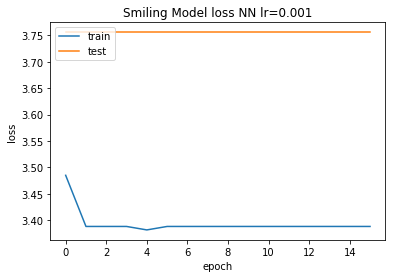

In [76]:
plt.plot(historyNN.history['loss'])
plt.plot(historyNN.history['val_loss'])
plt.title('Smiling Model loss NN lr=0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(historyNN.history['acc'])
plt.plot(historyNN.history['val_acc'])
plt.title('Smiling Model loss NN lr=.001')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

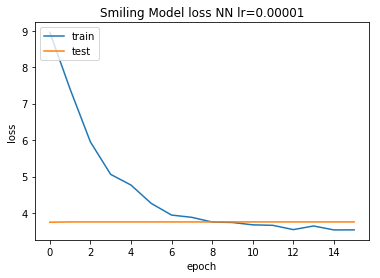

In [85]:
plt.plot(historyNN1.history['loss'])
plt.plot(historyNN1.history['val_loss'])
plt.title('Smiling Model loss NN lr=0.00001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

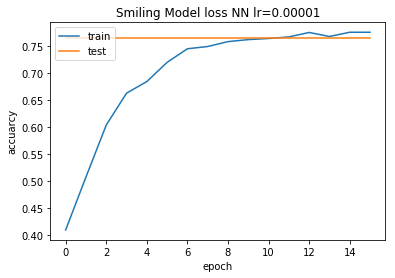

In [88]:
plt.plot(historyNN1.history['acc'])
plt.plot(historyNN1.history['val_acc'])
plt.title('Smiling Model loss NN lr=0.00001')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Convolutional Neural Network

In [3]:
def convModel(input_shape):
    
    
    
   
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    #X = Dropout(.3)(X)
    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_0')(X)
    
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(50, (2, 2), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = Dropout(.3)(X)
    X = MaxPooling2D((3, 3), name='max_pool_1')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu', name='fc0')(X)
    X = Dropout(.3)(X)
    X = Dense(128, activation='relu', name='fc1')(X)
    X = Dropout(.3)(X)
    X = Dense(1, activation='sigmoid', name='fc2')(X)
    

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='cutomModel')

    return model

import images as rgb (64,64,3)

In [8]:
x_testfiles,cx_train,cy_train,cx_test,cy_test=preprocessRGB('young',.2,(64,64))

Creating model , compiling it , creating callbacks for early stopping and plotting

In [9]:
cagemodel=convModel(cx_train.shape[1:])
#opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
cagemodel.compile(optimizer='adam',loss='binary_crossentropy',metrics = ["accuracy"])
monitor= EarlyStopping(monitor='val_loss',min_delta=1e-3,patience=10,verbose=1,mode='auto')
checkpointer =ModelCheckpoint(filepath='ageCNN1.hdf5',verbose=1,save_best_only=True)

Training CNN 50 mins with validation split and batch sizr 16 until improvement stops

In [10]:
historyCNN = cagemodel.fit(x=cx_train, y=cy_train, validation_split=0.2, epochs=100, batch_size=16,callbacks=[monitor,checkpointer], verbose=1)

Train on 2828 samples, validate on 708 samples
Epoch 1/100
2828/2828 [==============================] - 128s 45ms/step - loss: 0.6846 - acc: 0.8136 - val_loss: 0.3931 - val_acc: 0.8037

Epoch 00001: val_loss improved from inf to 0.39305, saving model to ageCNN1.hdf5
Epoch 2/100
2828/2828 [==============================] - 118s 42ms/step - loss: 0.3051 - acc: 0.8688 - val_loss: 0.2384 - val_acc: 0.9054

Epoch 00002: val_loss improved from 0.39305 to 0.23844, saving model to ageCNN1.hdf5
Epoch 3/100
2828/2828 [==============================] - 117s 41ms/step - loss: 0.2740 - acc: 0.8876 - val_loss: 0.2798 - val_acc: 0.8814

Epoch 00003: val_loss did not improve
Epoch 4/100
2828/2828 [==============================] - 114s 40ms/step - loss: 0.2593 - acc: 0.8861 - val_loss: 0.3380 - val_acc: 0.8545

Epoch 00004: val_loss did not improve
Epoch 5/100
2828/2828 [==============================] - 114s 40ms/step - loss: 0.2419 - acc: 0.9024 - val_loss: 0.4538 - val_acc: 0.7811

Epoch 00005: val

In [11]:
cagemodel.load_weigths=('ageCNN1.hdf5')
preds =cagemodel.evaluate(x =cx_test, y =cy_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

884/884 [==============================] - 12s 13ms/step

Loss = 0.27231386735428514
Test Accuracy = 0.8959276012705462


In [12]:
import pandas as pd
yhat=cagemodel.predict(cx_test)
df =pd.DataFrame(x_testfiles)
df['pred']=(np.round(yhat,0))
pred=np.array(df)
np.savetxt('Task2.csv', pred, delimiter=',',header=str(preds[1]))

In [13]:
cy_test.shape

(884,)

Saved model to disk


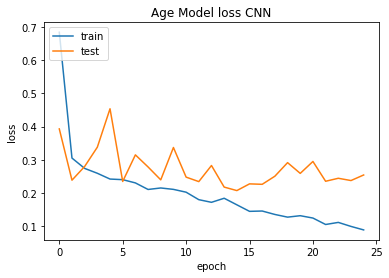

In [14]:
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('Age Model loss CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

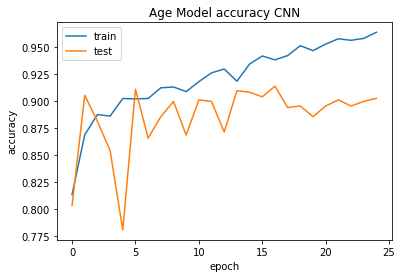

In [15]:
plt.plot(historyCNN.history['acc'])
plt.plot(historyCNN.history['val_acc'])
plt.title('Age Model accuracy CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
conf= confusion_matrix(cy_test,np.round(yhat,0))

In [17]:
conf

array([[130,  67],
       [ 25, 662]], dtype=int64)